# Lumber Price Prediction

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from sklearn.linear_model import LinearRegression 

In [64]:
df = pd.read_csv('datasets/lumber_prices.csv')

In [65]:
# conversion from date string to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# conversion from int string to int object
df['Price'] = df['Price'].str.replace(",","")
df['Price'] = pd.to_numeric(df['Price'])

In [66]:
df['TimeStamp'] = df['Date'].apply(lambda x: x.timestamp())

In [67]:
x = df[['TimeStamp']]
y = df['Price']


split_ratio = .8
split_index = int(len(df) * split_ratio)

x_train = x[:split_index]
y_train = y[:split_index]

x_test = x[split_index:]
y_test = y[split_index:]

x_train

,TimeStamp
0,1.672963e+09
1,1.672877e+09
2,1.672790e+09
3,1.672704e+09
4,1.672531e+09
...,...
612,1.597882e+09
613,1.597795e+09
614,1.597709e+09
615,1.597622e+09


In [68]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [69]:
prediction_string_format = '2023-4-14'
prediction_strptime = datetime.datetime.strptime(prediction_string_format, '%Y-%m-%d')
prediction_date_timestamp = prediction_strptime.timestamp()

pred_input = np.array([[prediction_date_timestamp]])

In [ ]:
predict_res = model.predict(pred_input)

predict_res

df_with_prediction = df.copy()
df_with_prediction
new_row = {'TimeStamp': prediction_date_timestamp, 'Price':predict_res[0]}
df_with_prediction.loc[len(df_with_prediction)] = new_row

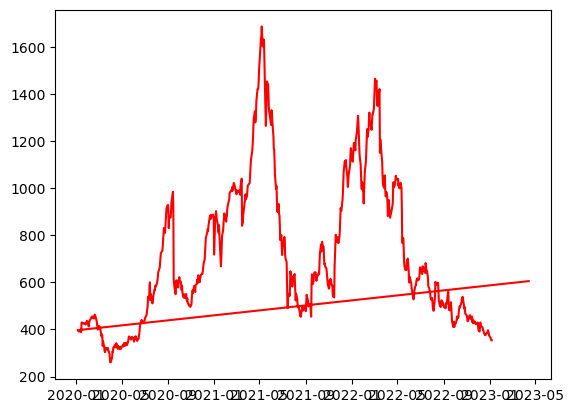

In [83]:
df_with_prediction['Date'] = df_with_prediction['TimeStamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))
plt.plot(df_with_prediction['Date'], df_with_prediction['Price'], c='r')
plt.show()